<a href="https://colab.research.google.com/github/AprilWuWu/AI-Portfolio/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet
https://github.com/zalandoresearch/fashion-mnist


In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


---
# Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    Dense(256, activation='relu', input_dim=784),
    Dense(128, activation='relu', input_dim=784),
    Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy # 自動做One-Hot
from tensorflow.keras.optimizers import Adam


model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=['accuracy'])

---
# 資料處理

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train_cat = to_categorical(y_train, num_classes=10)
# y_test_cat = to_categorical(y_test, num_classes=10)
# print(y_train[0])
# print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint('fasion-minst.h5', save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(x_train_norm,
     y_train, # 如果是自動做One-Hot就不用轉換
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[save_callback, stop_callback])

Epoch 1/50
270/270 - 2s - loss: 7.1695 - accuracy: 0.7448 - val_loss: 1.9774 - val_accuracy: 0.8042
Epoch 2/50
270/270 - 2s - loss: 1.5015 - accuracy: 0.8055 - val_loss: 1.2631 - val_accuracy: 0.8125
Epoch 3/50
270/270 - 2s - loss: 0.8883 - accuracy: 0.8233 - val_loss: 0.7827 - val_accuracy: 0.8233
Epoch 4/50
270/270 - 2s - loss: 0.6392 - accuracy: 0.8369 - val_loss: 0.6106 - val_accuracy: 0.8353
Epoch 5/50
270/270 - 2s - loss: 0.5051 - accuracy: 0.8505 - val_loss: 0.5849 - val_accuracy: 0.8437
Epoch 6/50
270/270 - 2s - loss: 0.4373 - accuracy: 0.8612 - val_loss: 0.5961 - val_accuracy: 0.8307
Epoch 7/50
270/270 - 2s - loss: 0.4016 - accuracy: 0.8670 - val_loss: 0.5804 - val_accuracy: 0.8330
Epoch 8/50
270/270 - 2s - loss: 0.3754 - accuracy: 0.8723 - val_loss: 0.5158 - val_accuracy: 0.8485
Epoch 9/50
270/270 - 2s - loss: 0.3461 - accuracy: 0.8797 - val_loss: 0.4953 - val_accuracy: 0.8593
Epoch 10/50
270/270 - 2s - loss: 0.3365 - accuracy: 0.8822 - val_loss: 0.4912 - val_accuracy: 0.8560

---
# 驗證資料

In [ ]:
model.evaluate(x_test_norm, y_test)
pre = model.predict_classes(x_test_norm)

313/313 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8649


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot',]

pd.DataFrame(confusion_matrix(y_test, pre),
       index=[f"{label[i]}(真實)" for i in range(10)],
       columns=[f"{label[i]}(預測)" for i in range(10)])


,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),790,2,24,49,4,1,122,0,8,0
Trouser(真實),1,964,2,19,9,0,3,0,2,0
Pullover(真實),7,1,771,12,115,0,94,0,0,0
Dress(真實),20,5,14,895,32,0,32,0,2,0
Coat(真實),1,0,90,42,782,0,84,0,1,0
Sandal(真實),0,0,0,1,0,950,0,29,5,15
Shirt(真實),125,0,91,35,83,1,657,0,8,0
Sneaker(真實),0,0,0,0,0,23,0,962,0,15
Bag(真實),6,0,1,5,4,3,29,5,945,2
Ankle boot(真實),0,0,0,0,0,9,2,56,0,933


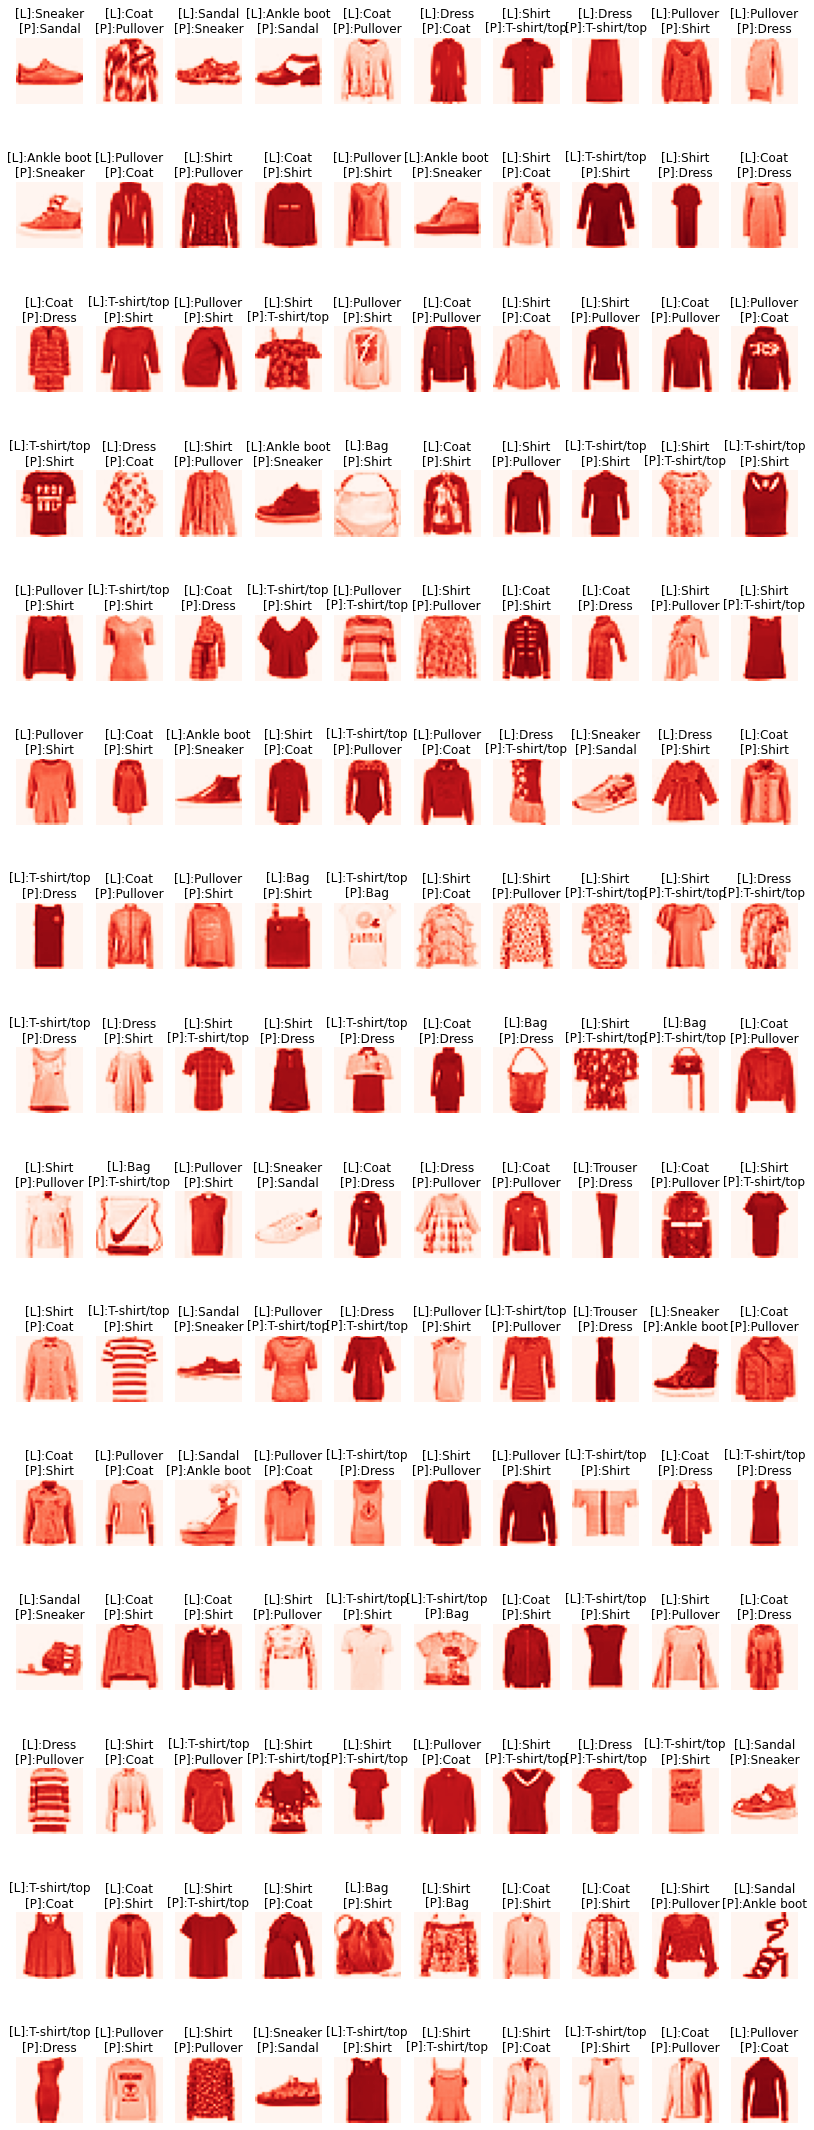

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 畫布寬高
plt.figure(figsize=(14, 42))

# 找到非0值的位置，他可以比較多維度
idx = np.nonzero(pre != y_test)[0][:150]

width = 10
height = len(idx) // width + 1

for i, d in enumerate(idx):
  img, l, p = x_test[d], y_test[d], pre[d]
  t = f'[L]:{label[l]}\n[P]:{label[p]}'
  plt.subplot(height, width, i+1)
  plt.title(t)
  plt.axis('off')
  plt.imshow(img, cmap='Reds')